In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Exercise 1

## 1.3

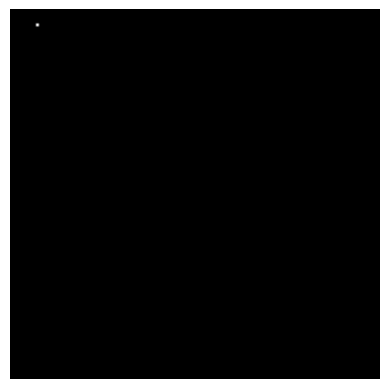

In [2]:
p, q = 5 , 9
Fhat = np.zeros((128, 128)) 
Fhat[p , q] = 1
showgrey(Fhat)

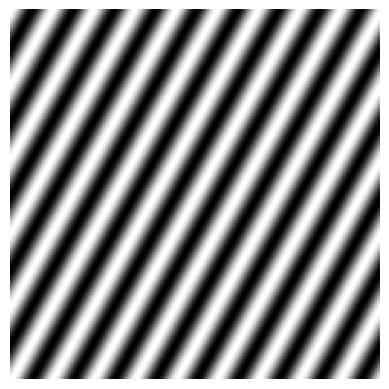

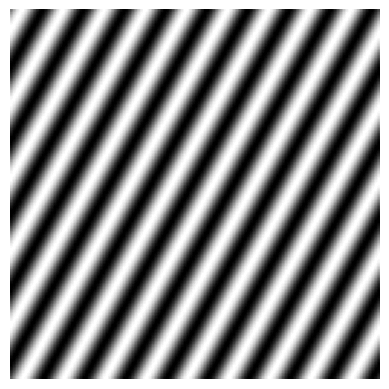

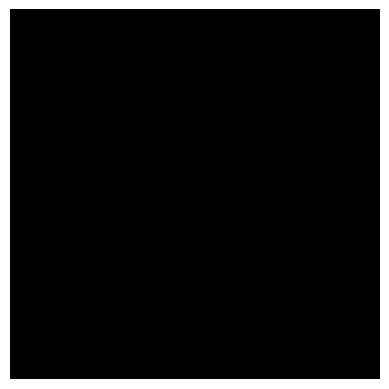

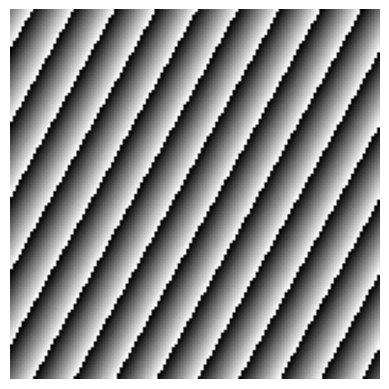

In [3]:
F = ifft2(Fhat)

Fabsmax = np.max(np.abs(F))

showgrey(np.real(F), True, 64, -Fabsmax, Fabsmax)
showgrey(np.imag(F), True, 64, -Fabsmax, Fabsmax)
showgrey(np.abs(F), True, 64, -Fabsmax, Fabsmax)
showgrey(np.angle(F), True, 64, -np.pi, np.pi)


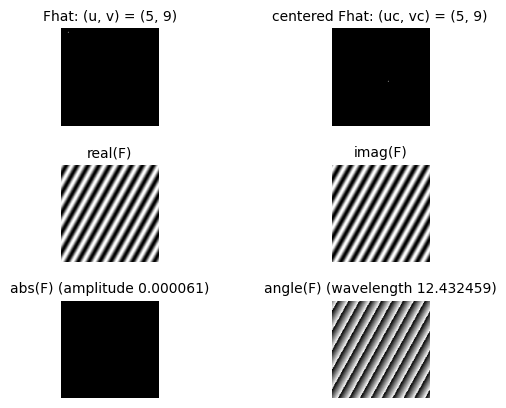

In [4]:
fftwave(p,q)

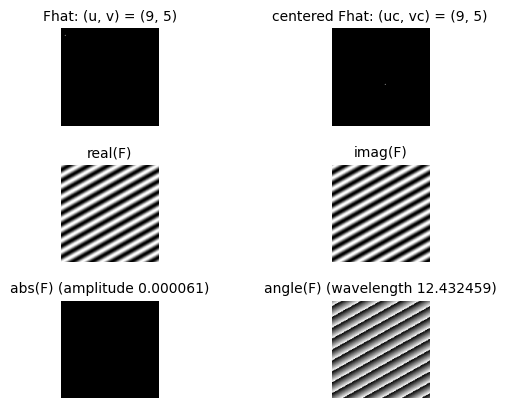

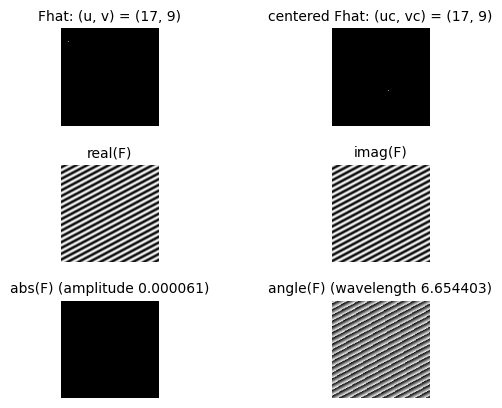

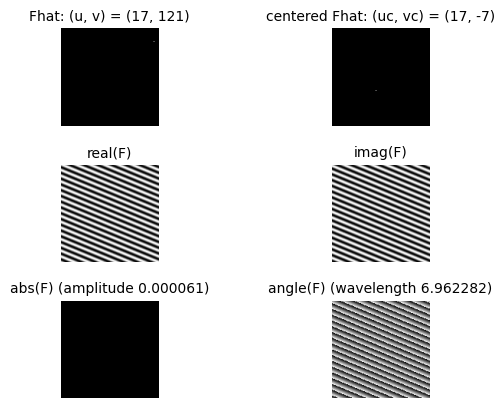

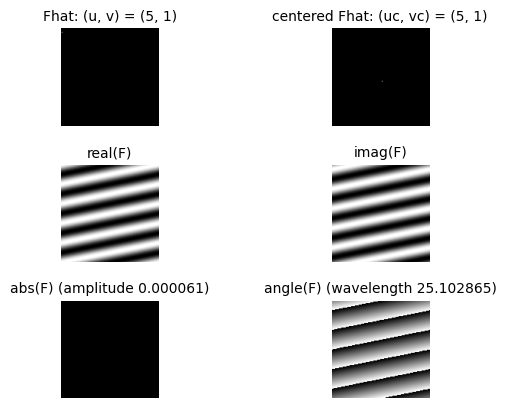

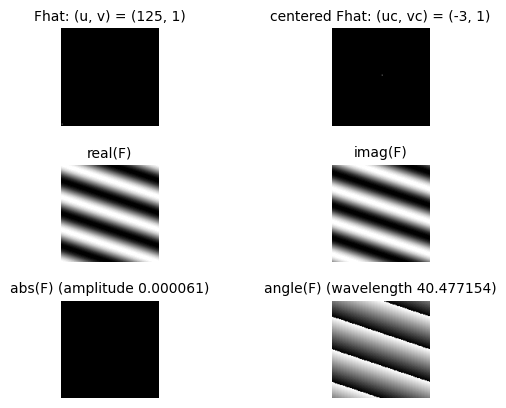

In [5]:
# Question 1
points = [(9,5),(17,9),(17,121),(5,1), (125,1)]

for point in points:
    fftwave(point[0],point[1])


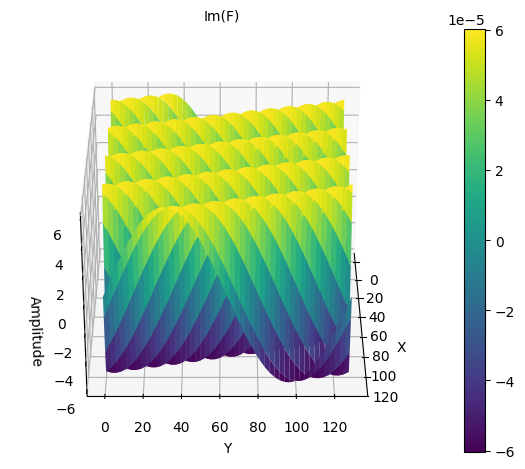

In [6]:
# Question 2
N = 128
x = np.linspace(0, N, 100)
y = np.linspace(0, N, 50)
p=4
q=1
Fhat = np.zeros((128, 128)) 
Fhat[p , q] = 1

X, Y = np.meshgrid(x, y)
sinusoid_2d_im = Fhat[p,q] * np.sin(2 * np.pi * p * X / N  + 2 * np.pi * q * Y/N) / N**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, sinusoid_2d_im, cmap='viridis')
fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Amplitude')
ax.set_title('Im(F)')
ax.view_init(elev=30, azim=0)
fig.tight_layout()

plt.show()

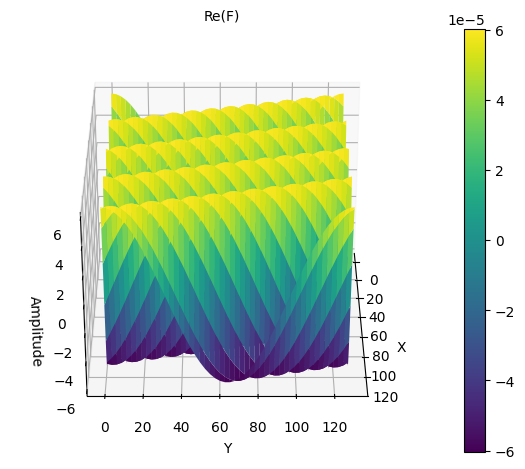

In [7]:
N = 128
x = np.linspace(0, N, 100)
y = np.linspace(0, N, 50)
X, Y = np.meshgrid(x, y)

sinusoid_2d_real = Fhat[p,q] * np.cos(2 * np.pi * p * X / N  + 2 * np.pi * q * Y/N) / N**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, sinusoid_2d_real, cmap='viridis')
fig.colorbar(surf)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Amplitude')
ax.set_title('Re(F)')
ax.view_init(elev=30, azim=0)
fig.tight_layout()

plt.show()

In [8]:
def centered_plot(coordinates):
    N = 128
    f = plt.figure(figsize=(10, 10))
    f.subplots_adjust(wspace=0.2, hspace=0.4)
    for coordinate in coordinates:
        Fhat = np.zeros([N, N])
        Fhat[coordinate[0], coordinate[1]] = 1
        a1 = f.add_subplot(3, 2, 1)
        showgrey(Fhat, False)
        a1.title.set_text("Fhat: (u, v) = (%d, %d)" % (coordinate[0], coordinate[1]))
        new_coordinates = []
        for c in coordinate:
            if c < N/2:
                uc = c
            else:
                uc = c - N
            new_coordinates.append(uc)

        a2 = f.add_subplot(3, 2, 2)
        #it shifts the zero-frequency component to the center of the spectrum
        showgrey(np.fft.fftshift(Fhat), False)
        a2.title.set_text("centered Fhat: (uc, vc) = (%d, %d)" % (new_coordinates[0], new_coordinates[1]))
    

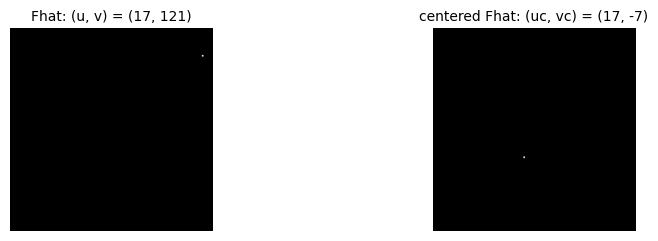

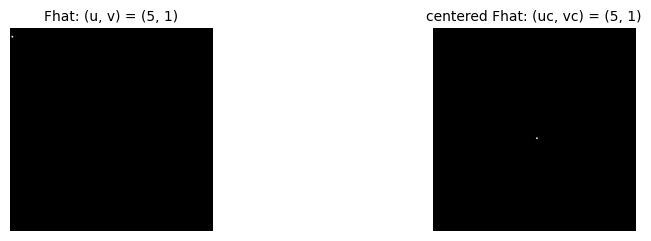

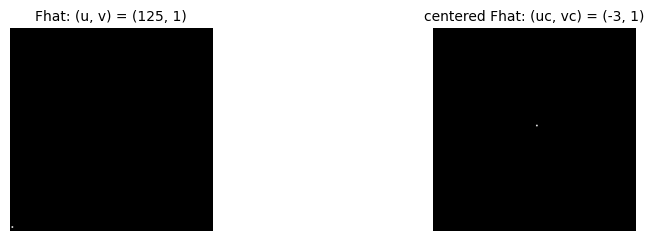

In [9]:
#Question 5
coordinates = [(17,121),(5,1), (125,1)]
for coordinate in coordinates:
    centered_plot([coordinate])


## 1.4

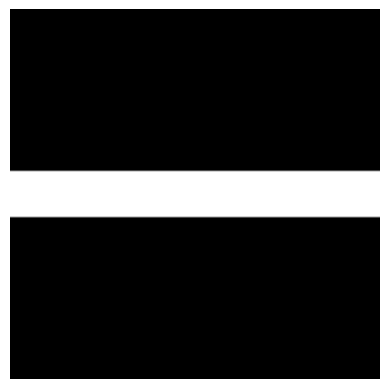

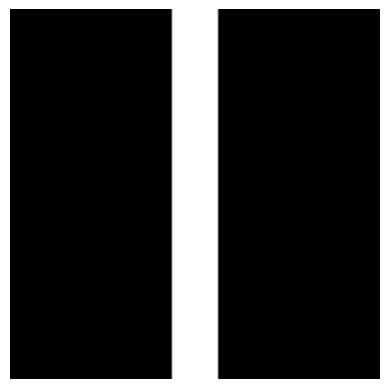

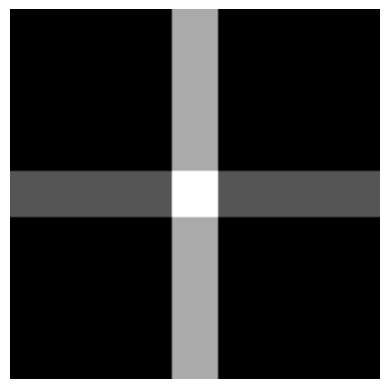

In [10]:

F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))]) 
G = F.T
H = F + 2*G

showgrey(F)
showgrey(G)
showgrey(H)

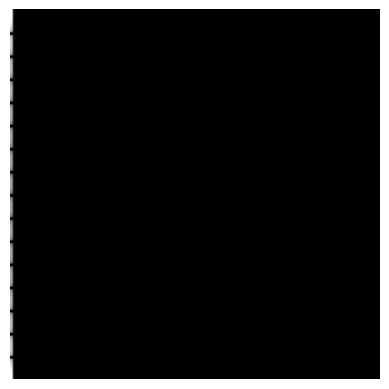

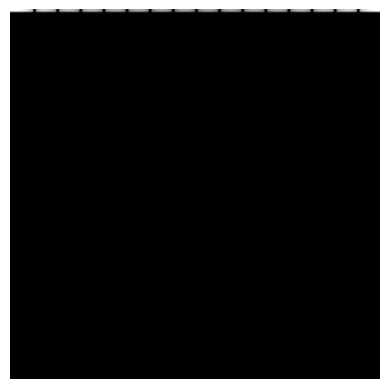

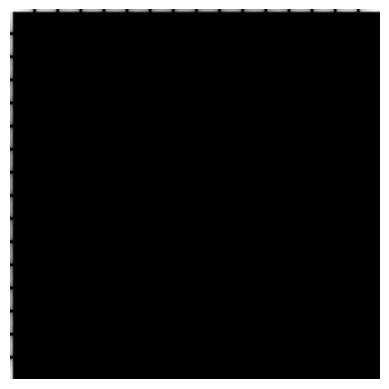

In [11]:
Fhat = fft2(F) 
Ghat = fft2(G) 
Hhat = fft2(H)

showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

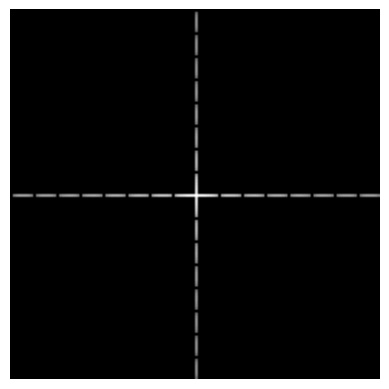

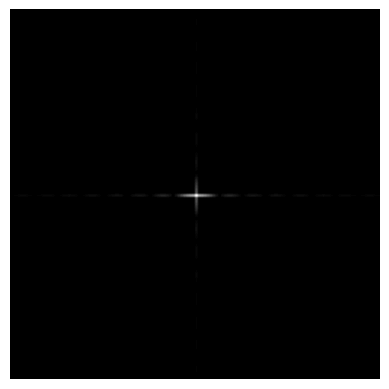

In [12]:
#logarithmic scaling  vs linear scaling
showgrey(np.log(1 + np.abs(fftshift(Hhat))))
showgrey(np.abs(fftshift(Hhat)))


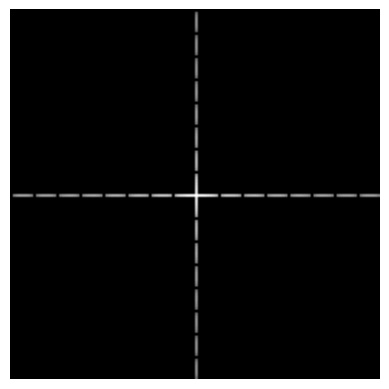

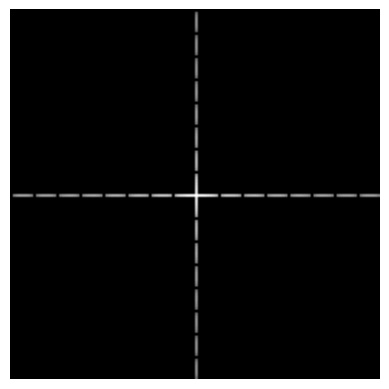

In [13]:
#Both functions provide the same result
showgrey(np.log(1 + np.abs(fftshift(Hhat))))
showfs(Hhat)

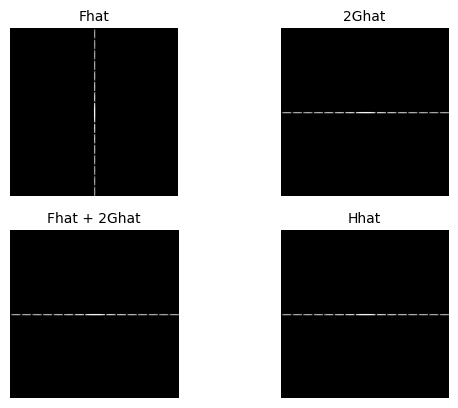

In [14]:
# Question 9
# Showing linear properties of the Fourier transform

lin_comb = Fhat + 2*Ghat

f = plt.figure()
a1 = f.add_subplot(2,2, 1)
a1.set_title('Fhat')  
showfs(Fhat,False)

a2 = f.add_subplot(2,2, 2)
a2.set_title('2Ghat')
showfs(2*Ghat,False)

a3 = f.add_subplot(2,2, 3)
a3.set_title('Fhat + 2Ghat')
showfs(2*Ghat,False)

a4 = f.add_subplot(2,2, 4)
a4.set_title('Hhat')
showfs(2*Ghat,False)

plt.show()


## 1.5

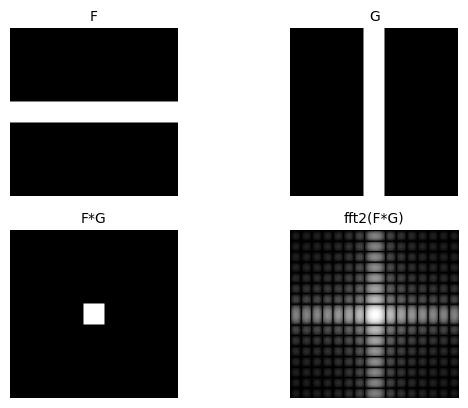

In [15]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))]) 
G = F.T
H= F*G

f = plt.figure()
f.subplots_adjust(wspace=0.3, hspace=0.2)
a1 = f.add_subplot(2,2, 1)
a1.set_title('F')  
showgrey(F,False)

a2 = f.add_subplot(2,2, 2)
a2.set_title('G')
showgrey(G,False)

a3 = f.add_subplot(2,2, 3)
a3.set_title('F*G')
showgrey(F*G,False)

a4 = f.add_subplot(2,2, 4)
a4.set_title('fft2(F*G)')
showfs(fft2(F*G),False)

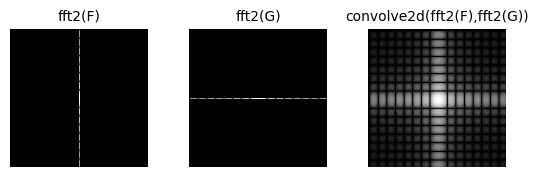

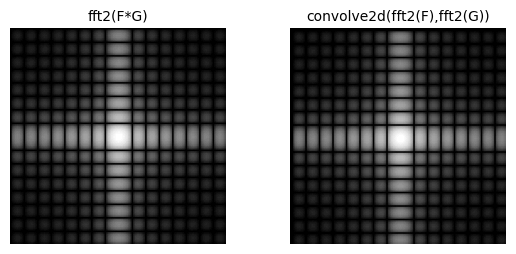

In [16]:
# Question 10
# Multiplication in the spatial domain is convolution in the Fourier domain
Fhat = fft2(F)
Ghat = fft2(G)
#convolution results needs to be normalized by the number of pixels
conv_FG = convolve2d(fftshift(Fhat),fftshift(Ghat),mode ='same')/128**2
conv_FG = fftshift(conv_FG)

fig = plt.figure()
fig.subplots_adjust(wspace=0.3, hspace=0.2)
b1 = fig.add_subplot(1,3, 1)
b1.set_title('fft2(F)')
showfs(Fhat,False)

b2 = fig.add_subplot(1,3, 2)
b2.set_title('fft2(G)')
showfs(Ghat,False)

b3 = fig.add_subplot(1,3, 3)
b3.set_title('convolve2d(fft2(F),fft2(G))')
showfs(conv_FG,False)


f = plt.figure()
f.subplots_adjust(wspace=0.3, hspace=0.2)
a1 = f.add_subplot(1,2, 1)
a1.set_title('fft2(F*G)')  
showfs(fft2(F*G),False)

a2 = f.add_subplot(1,2, 2)
a2.set_title('convolve2d(fft2(F),fft2(G))')
showfs(conv_FG,False)
plt.show()

## 1.6

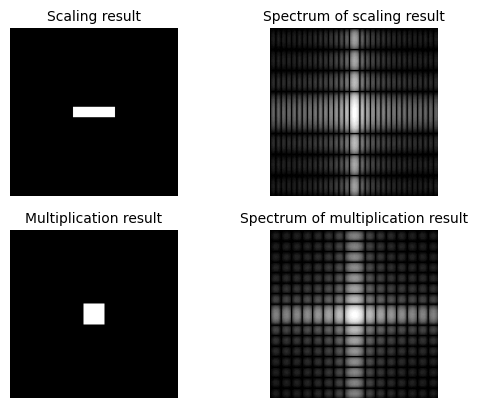

In [17]:
#Question 11
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)
Fhat = fft2(F)

F_2 = H # F*G from previous question

f = plt.figure()
f.subplots_adjust(wspace=0.1, hspace=0.2)
a1 = f.add_subplot(2,2, 1)
a1.set_title('Scaling result')
showgrey(F,False)
a2 = f.add_subplot(2,2, 2)
a2.set_title('Spectrum of scaling result')
showfs(Fhat,False)
a1 = f.add_subplot(2,2, 3)
a1.set_title('Multiplication result')
showgrey(F_2,False)
a2 = f.add_subplot(2,2, 4)
a2.set_title('Spectrum of multiplication result')
showfs(fft2(F_2),False)


## 1.7

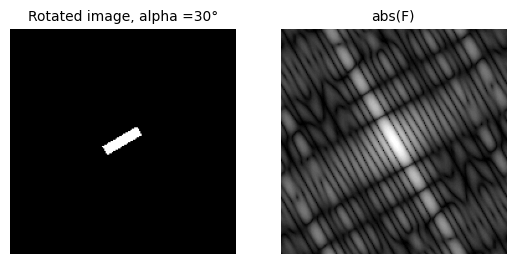

In [18]:
#Question 12
f = plt.figure()
alpha = 30
G = rot(F, alpha ) 
a1 = f.add_subplot(1,2, 1)
a1.set_title('Rotated image, alpha ={}°'.format(alpha))  
showgrey(G,False)
Ghat = fft2(G)
a2 = f.add_subplot(1,2, 2)
a2.set_title('abs(F)')
showfs(Ghat,False)
plt.show()

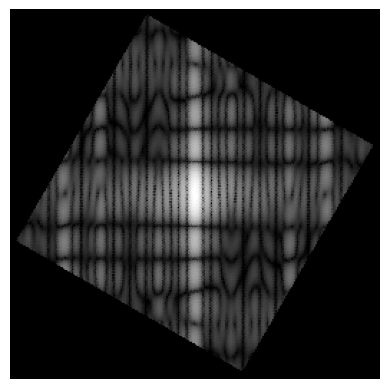

In [19]:
Hhat = rot(fftshift(Ghat), -alpha )
showgrey(np.log(1 + abs(Hhat)))

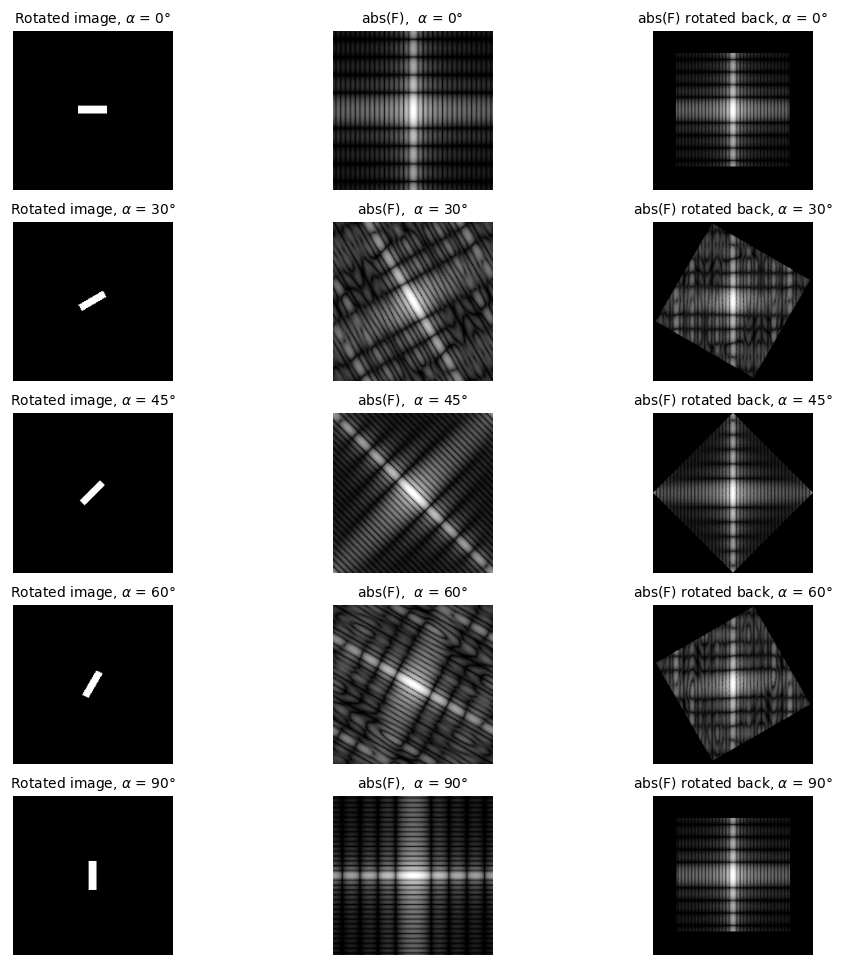

In [20]:
alphas = [0, 30, 45, 60, 90]
f = plt.figure(figsize=(12,12))
f.subplots_adjust(wspace=0.1, hspace=0.2)
i = 1
for alpha in alphas:
    G = rot(F, alpha ) 
    Ghat = fft2(G)
    a = f.add_subplot(len(alphas),3, i)
    
    a.set_title('Rotated image, $\\alpha$ = '+str(alpha)+'°')
    
    showgrey(G,False)
    
    b = f.add_subplot(len(alphas),3, i+1)
    
    b.set_title('abs(F),  $ \\alpha $ = '+str(alpha)+'°')
    showfs(Ghat,False)

    G_inv = rot(fftshift(Ghat), -alpha )
    c = f.add_subplot(len(alphas),3, i+2)
    c.set_title('abs(F) rotated back, $\\alpha$ = '+str(alpha)+'°')
    showgrey((np.log(1 + np.abs(G_inv))), False)
    i+=3
    

plt.show()

## 1.8

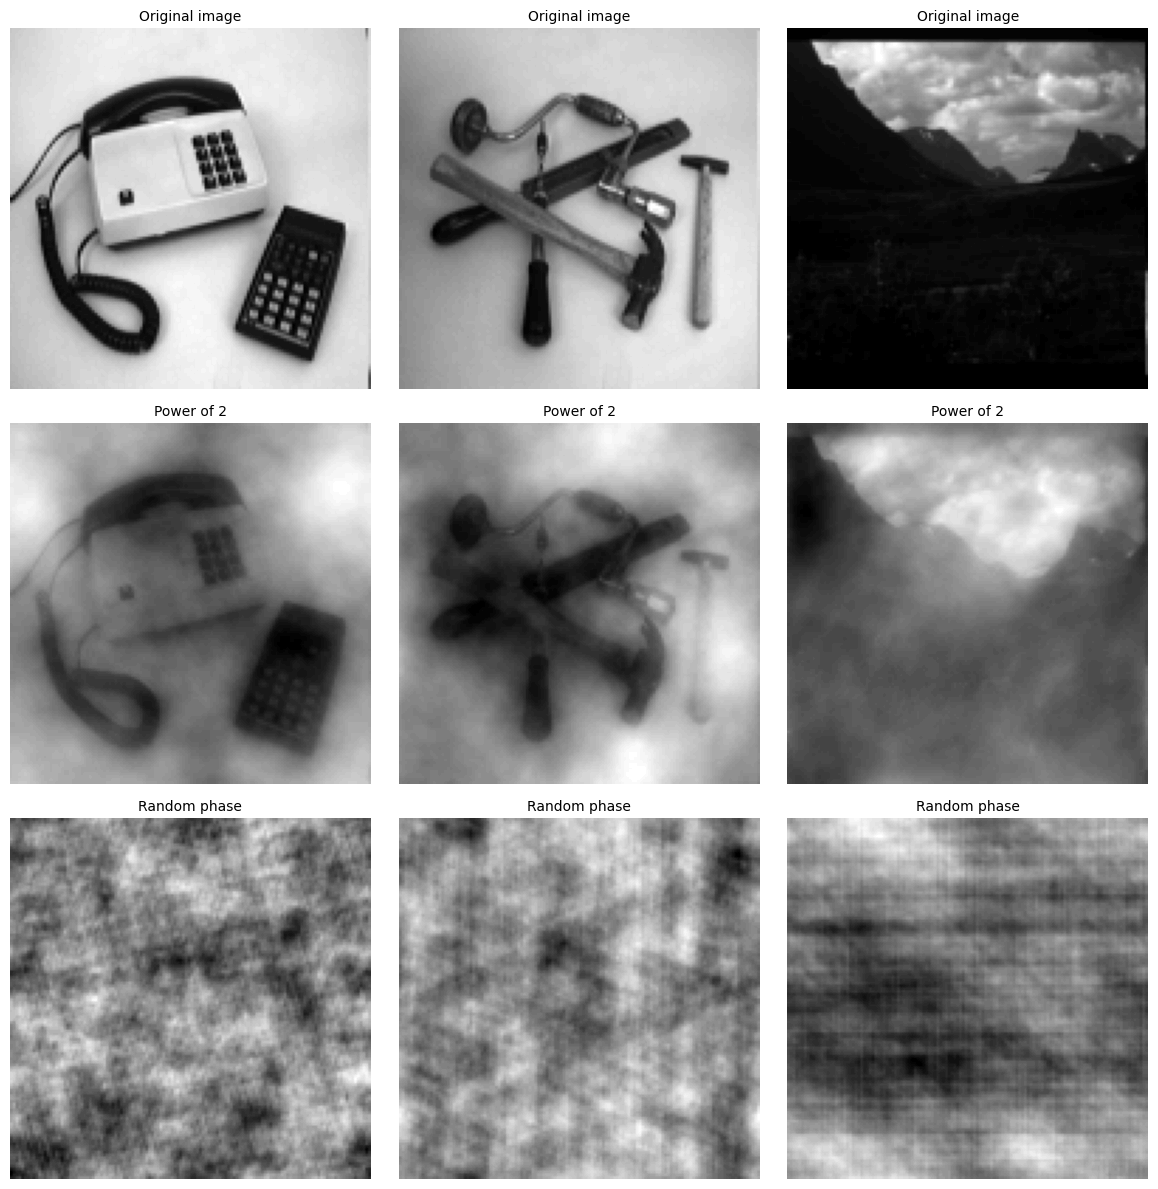

In [21]:
# Question 13

imgs=list()
imgs.append(np.load("Images-npy/phonecalc128.npy"))
imgs.append(np.load("Images-npy/few128.npy"))
imgs.append(np.load("Images-npy/nallo128.npy"))

imgs_pw = list()
for img in imgs:
    imgs_pw.append(pow2image(img))

imgs_rand = list()
for img in imgs:
    imgs_rand.append(randphaseimage(img))

f=plt.figure(figsize=(12,12))
f.subplots_adjust(wspace=0.1, hspace=0.2)
j=1
for i in range(len(imgs)):
    a = f.add_subplot(3,len(imgs), i+1)
    a.set_title('Original image')
    showgrey(imgs[i],False)

    b = f.add_subplot(3,len(imgs), i+1+len(imgs))
    b.set_title('Power of 2')
    showgrey(imgs_pw[i],False)

    c = f.add_subplot(3,len(imgs), i+1+2*len(imgs))
    c.set_title('Random phase')
    showgrey(imgs_rand[i],False)
f.tight_layout()
plt.show()

# Exercise 2

## 2.3

Covariance matrix:
[[0.013 0.   ]
 [0.    0.013]]
Covariance matrix of ideal continuous case:
[[0.1 0. ]
 [0.  0.1]]


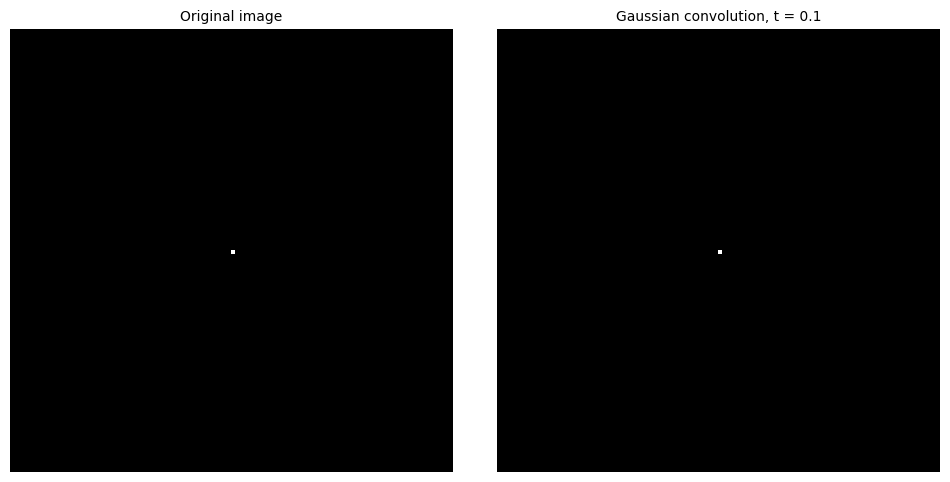

Covariance matrix:
[[0.281 0.   ]
 [0.    0.281]]
Covariance matrix of ideal continuous case:
[[0.3 0. ]
 [0.  0.3]]


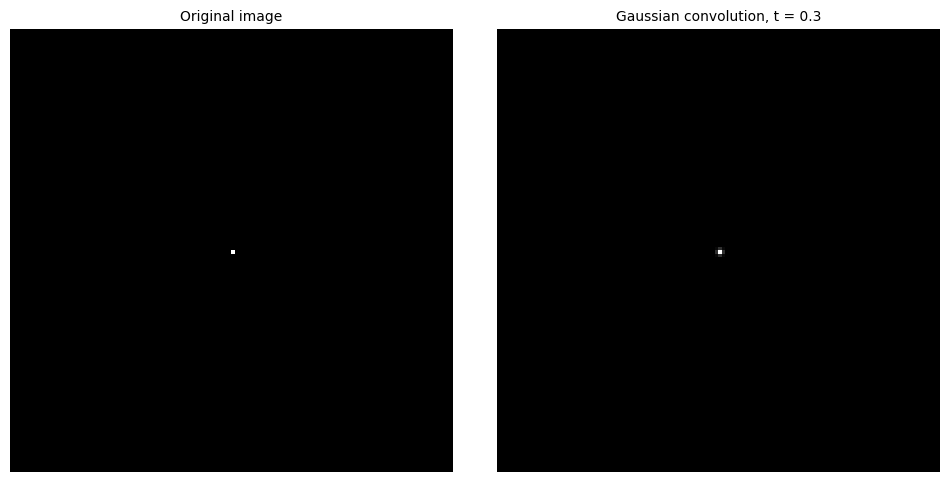

Covariance matrix:
[[ 1. -0.]
 [-0.  1.]]
Covariance matrix of ideal continuous case:
[[1. 0.]
 [0. 1.]]


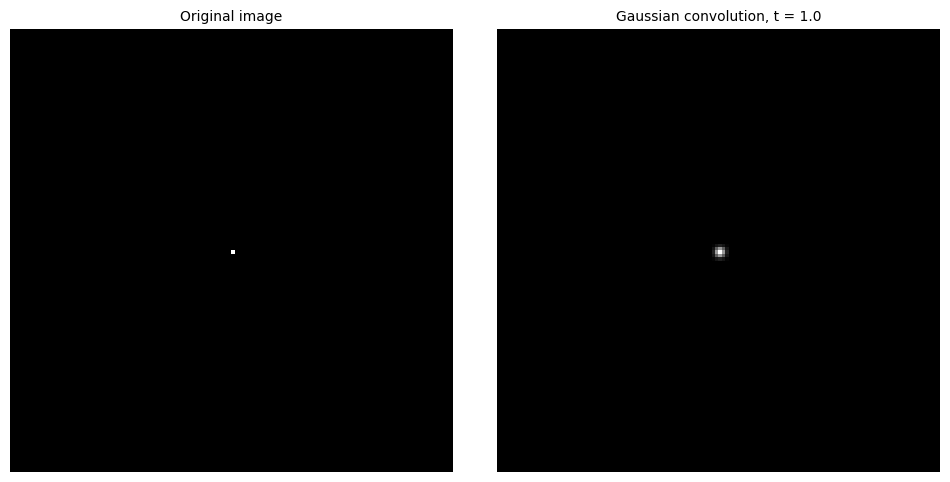

Covariance matrix:
[[10.  0.]
 [ 0. 10.]]
Covariance matrix of ideal continuous case:
[[10.  0.]
 [ 0. 10.]]


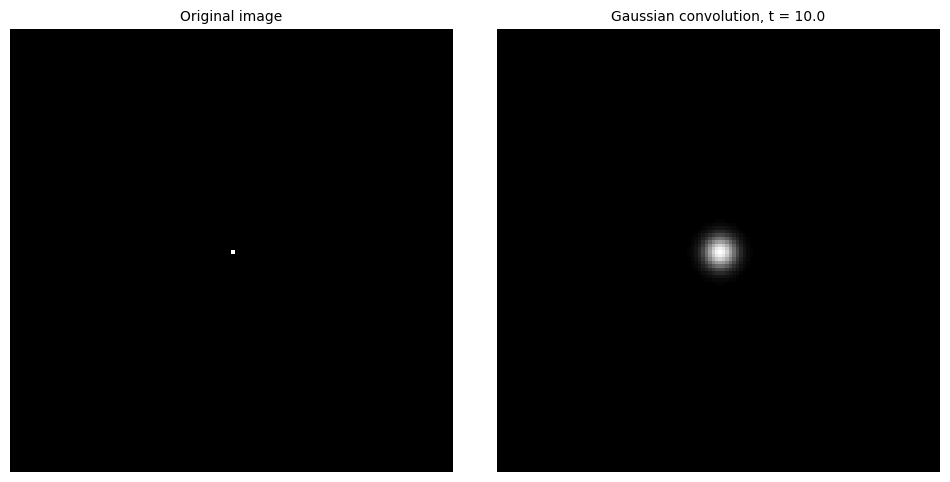

Covariance matrix:
[[100.  -0.]
 [ -0. 100.]]
Covariance matrix of ideal continuous case:
[[100.   0.]
 [  0. 100.]]


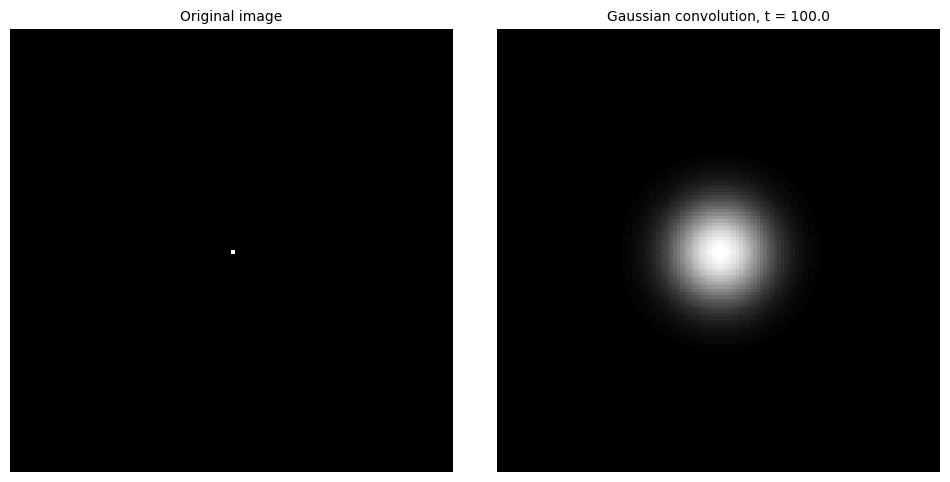

In [22]:
#Question 14
#Convolution with Gaussian filter, gaussfft case
t_s= [0.1,0.3,1.0,10.0,100.0]
estimated_covariances = list()
true_covariances = [t*np.identity(2) for t in t_s]
img = deltafcn(128,128)

for t in t_s:
    conv_result = gaussfft(img,t)

    f=plt.figure(figsize=(12,12))
    f.subplots_adjust(wspace=0.1, hspace=0.2)
    a = f.add_subplot(1,2,1)
    a.set_title('Original image')
    showgrey(img, False)
    b = f.add_subplot(1,2,2)
    b.set_title('Gaussian convolution, t = '+str(t))
    showgrey(conv_result,False)
    print("Covariance matrix:")
    cov_matrix = variance(conv_result)
    estimated_covariances.append(cov_matrix) # saving unrounded values
    cov_matrix = np.round(cov_matrix, 3)
    
    print(cov_matrix)
    print("Covariance matrix of ideal continuous case:")
    print(t*np.identity(2))
    plt.show()

(128, 128) (128, 128) (128, 128)
Covariance matrix:
[[0.1 0. ]
 [0.  0.1]]
Covariance matrix of ideal continuous case:
[[0.1 0. ]
 [0.  0.1]]


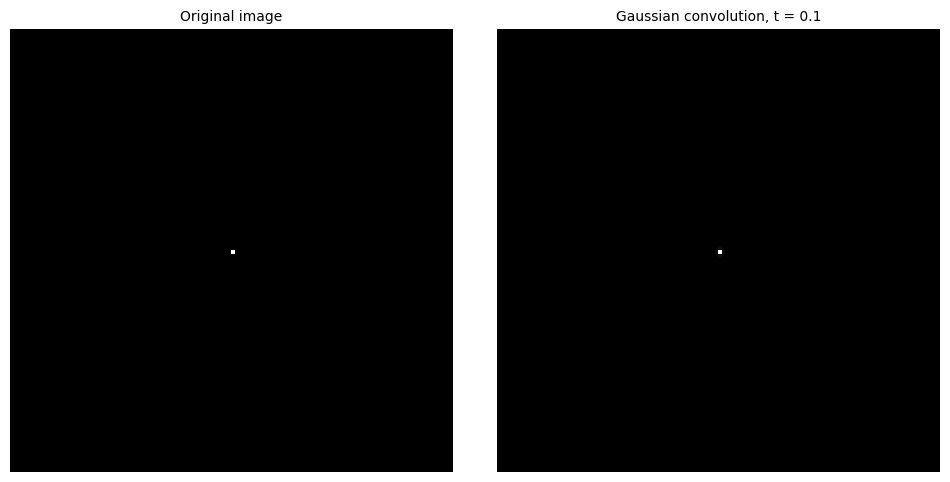

(128, 128) (128, 128) (128, 128)
Covariance matrix:
[[ 0.3 -0. ]
 [-0.   0.3]]
Covariance matrix of ideal continuous case:
[[0.3 0. ]
 [0.  0.3]]


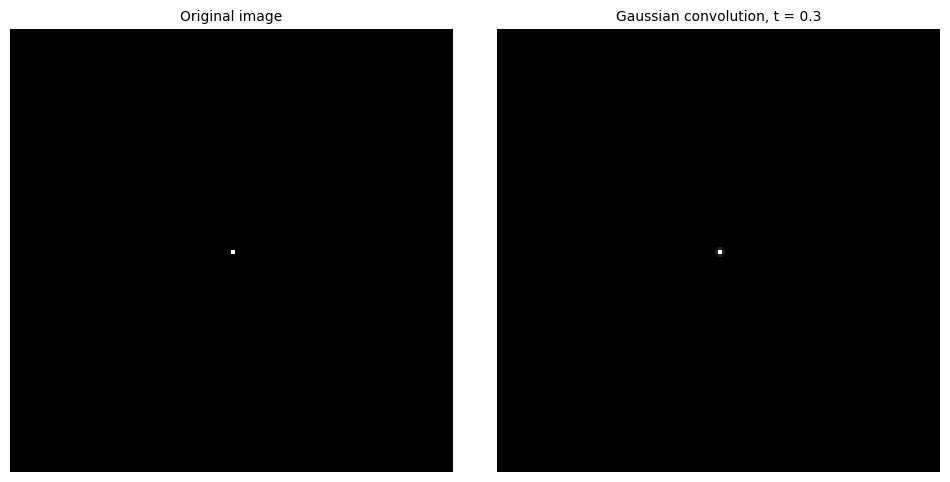

(128, 128) (128, 128) (128, 128)
Covariance matrix:
[[1. 0.]
 [0. 1.]]
Covariance matrix of ideal continuous case:
[[1. 0.]
 [0. 1.]]


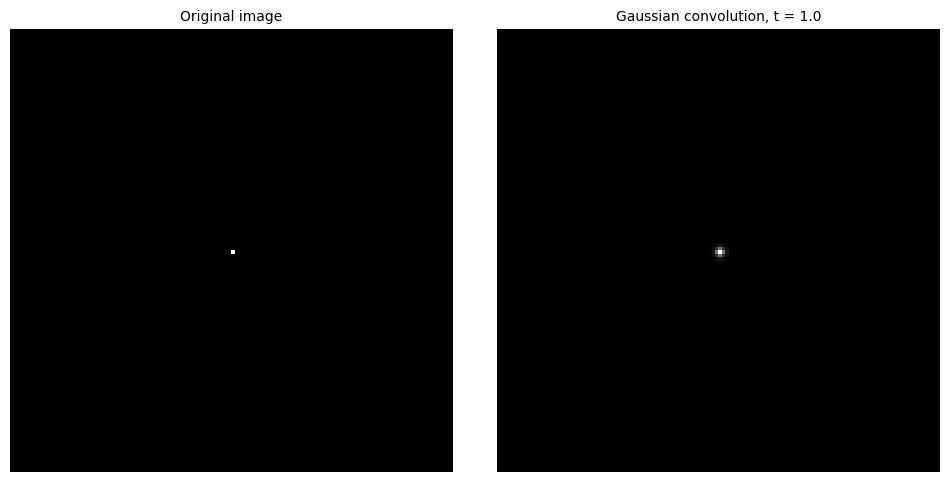

(128, 128) (128, 128) (128, 128)
Covariance matrix:
[[10.  0.]
 [ 0. 10.]]
Covariance matrix of ideal continuous case:
[[10.  0.]
 [ 0. 10.]]


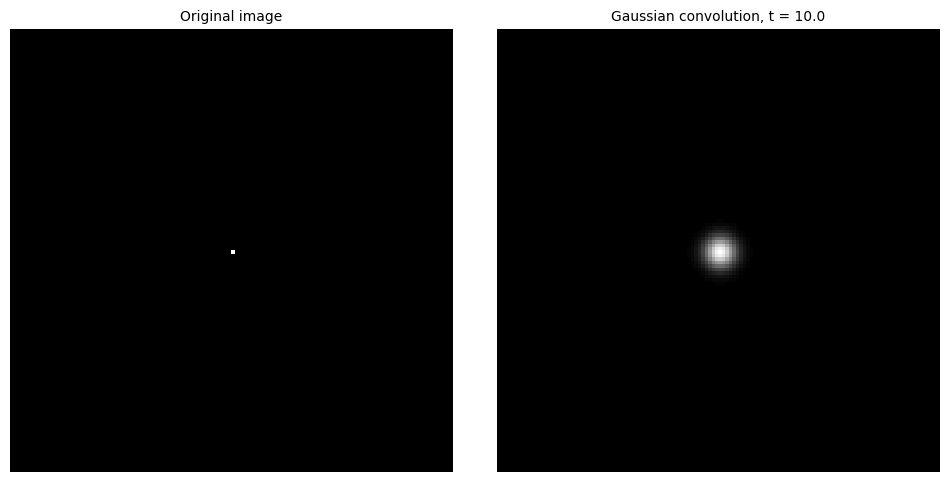

(128, 128) (128, 128) (128, 128)
Covariance matrix:
[[100.  -0.]
 [ -0. 100.]]
Covariance matrix of ideal continuous case:
[[100.   0.]
 [  0. 100.]]


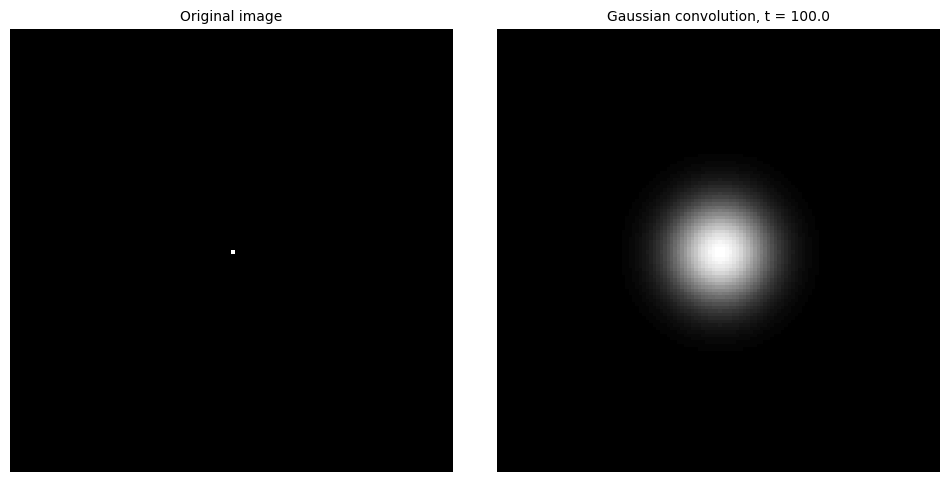

In [23]:
#Convolution with Gaussian filter, discgaussfft case
t_s= [0.1,0.3,1.0,10.0,100.0]
estimated_covariances = list()
true_covariances = [t*np.identity(2) for t in t_s]
img = deltafcn(128,128)

for t in t_s:
    conv_result = discgaussfft(img,t)

    f=plt.figure(figsize=(12,12))
    f.subplots_adjust(wspace=0.1, hspace=0.2)
    a = f.add_subplot(1,2,1)
    a.set_title('Original image')
    showgrey(img, False)
    b = f.add_subplot(1,2,2)
    b.set_title('Gaussian convolution, t = '+str(t))
    showgrey(conv_result,False)
    print("Covariance matrix:")
    cov_matrix = variance(conv_result)
    estimated_covariances.append(cov_matrix) # saving unrounded values
    cov_matrix = np.round(cov_matrix, 3)
    
    print(cov_matrix)
    print("Covariance matrix of ideal continuous case:")
    print(t*np.identity(2))
    plt.show()

In [24]:
#Question 15
differences = [np.abs(estimated_covariances[i] - true_covariances[i]) for i in range(len(t_s))]
for i in range(len(t_s)):
    print("Difference between estimated and true covariance matrix for t = "+str(t_s[i]))
    print(differences[i])



Difference between estimated and true covariance matrix for t = 0.1
[[8.55440718e-12 1.03139719e-13]
 [1.03139719e-13 8.55995830e-12]]
Difference between estimated and true covariance matrix for t = 0.3
[[7.13168413e-12 8.71802630e-14]
 [8.71802630e-14 7.52470308e-12]]
Difference between estimated and true covariance matrix for t = 1.0
[[5.06217290e-12 5.39568390e-14]
 [5.39568390e-14 5.22515364e-12]]
Difference between estimated and true covariance matrix for t = 10.0
[[6.83542112e-12 2.37587727e-14]
 [2.37587727e-14 6.90825175e-12]]
Difference between estimated and true covariance matrix for t = 100.0
[[1.10982853e-07 9.50073353e-14]
 [9.50073353e-14 1.10982768e-07]]


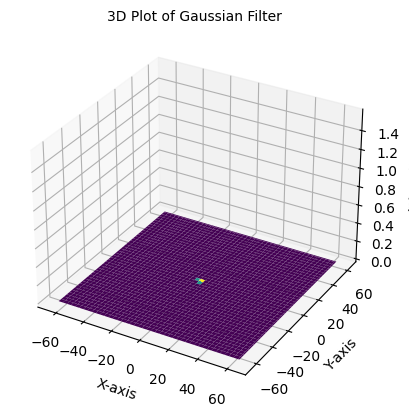

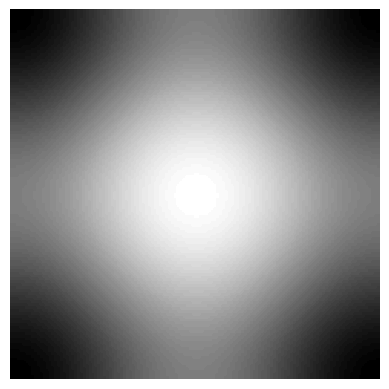

In [25]:
#Gaussian filter for t <1.0 : spike behaviour in the spatial domain
x_dim = 128
y_dim = 128
t=0.1
[x, y] = np.meshgrid(np.arange(-x_dim/2, x_dim/2), np.arange(-y_dim/2, y_dim/2))
gaussian_kernel = 1 / (2 * np.pi * t) * np.exp(-(x**2 + y**2) / (2 * t))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, gaussian_kernel, cmap='viridis')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Intensity')
plt.title('3D Plot of Gaussian Filter')
plt.show()

#DFT of Gaussian filter for t <1.0
gauss_hat = fft2(gaussian_kernel)
showfs(gauss_hat)

In [26]:
#Question 16
t_s  = [1.0,4.0,16.0,64.0,256.0]
imgs = list()
imgs.append(np.load("Images-npy/phonecalc128.npy"))
imgs.append(np.load("Images-npy/few128.npy"))
imgs.append(np.load("Images-npy/nallo128.npy"))

imgs_conv = list()
for img in imgs:
    imgs_conv_i = list()
    for t in t_s:
        imgs_conv_i.append(gaussfft(img,t))
    imgs_conv.append(imgs_conv_i)


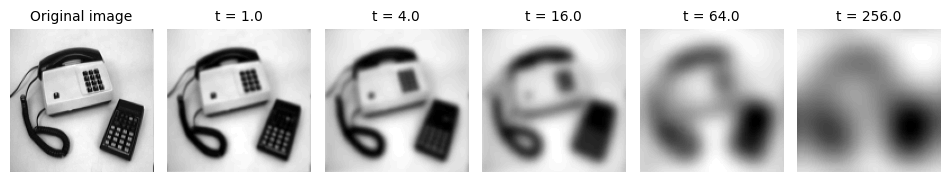

In [27]:
#img 1
i=1
f=plt.figure(figsize=(12,12))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a  = f.add_subplot(1,len(t_s)+1, i)
a.set_title('Original image')
showgrey(imgs[0],False)
imgs_gauss=imgs_conv[0]
for _ in range(len(t_s)):
    a = f.add_subplot(1,len(t_s)+1, i+1)
    a.set_title('t = '+str(t_s[i-1]))
    showgrey(imgs_gauss[i-1],False)
    i+=1
plt.show()


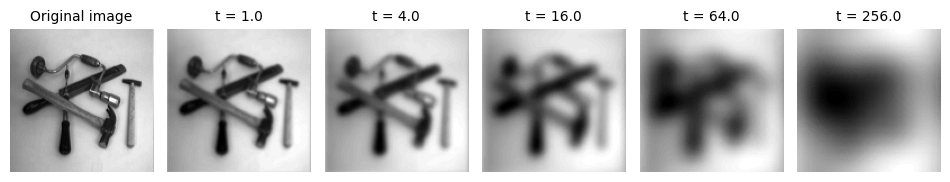

In [28]:
#img 2
i=1
f=plt.figure(figsize=(12,12))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a  = f.add_subplot(1,len(t_s)+1, i)
a.set_title('Original image')
showgrey(imgs[1],False)
imgs_gauss=imgs_conv[1]
for _ in range(len(t_s)):
    a = f.add_subplot(1,len(t_s)+1, i+1)
    a.set_title('t = '+str(t_s[i-1]))
    showgrey(imgs_gauss[i-1],False)
    i+=1
plt.show()

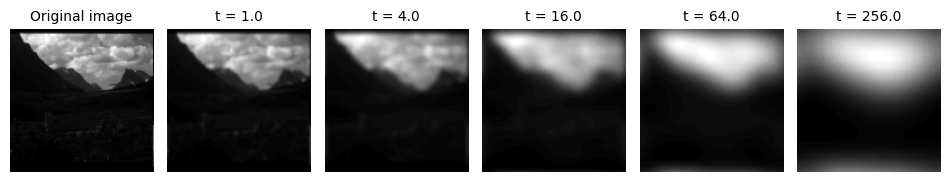

In [29]:
#img 3
i=1
f=plt.figure(figsize=(12,12))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a  = f.add_subplot(1,len(t_s)+1, i)
a.set_title('Original image')
showgrey(imgs[2],False)
imgs_gauss=imgs_conv[2]
for _ in range(len(t_s)):
    a = f.add_subplot(1,len(t_s)+1, i+1)
    a.set_title('t = '+str(t_s[i-1]))
    showgrey(imgs_gauss[i-1],False)
    i+=1
plt.show()

# Exercise 3

## 3.1

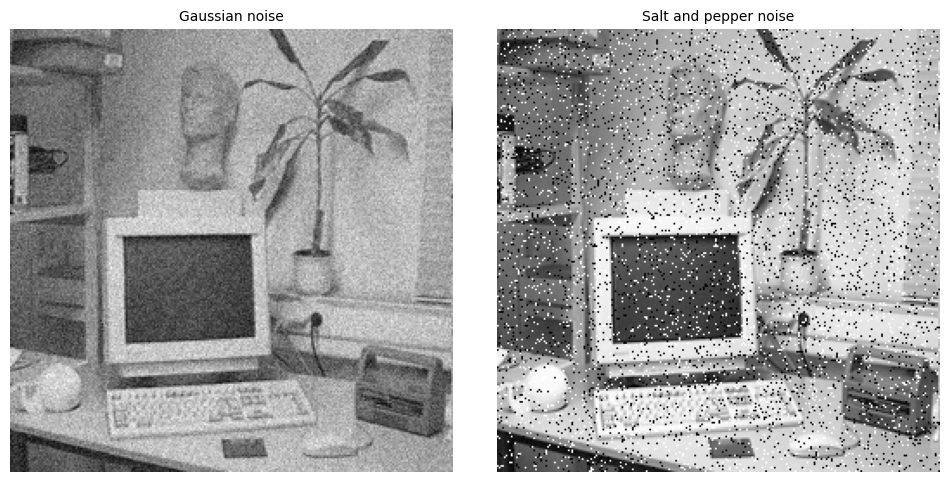

In [30]:
office = np.load("Images-npy/office256.npy")

add = gaussnoise(office,16)
sap = sapnoise(office,0.1,255)


f=plt.figure(figsize=(12,12))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a  = f.add_subplot(1,2, 1)
a.set_title('Gaussian noise')
showgrey(add,False)
a  = f.add_subplot(1,2, 2)
a.set_title('Salt and pepper noise')
showgrey(sap,False)
plt.show()

### Gaussian smoothing

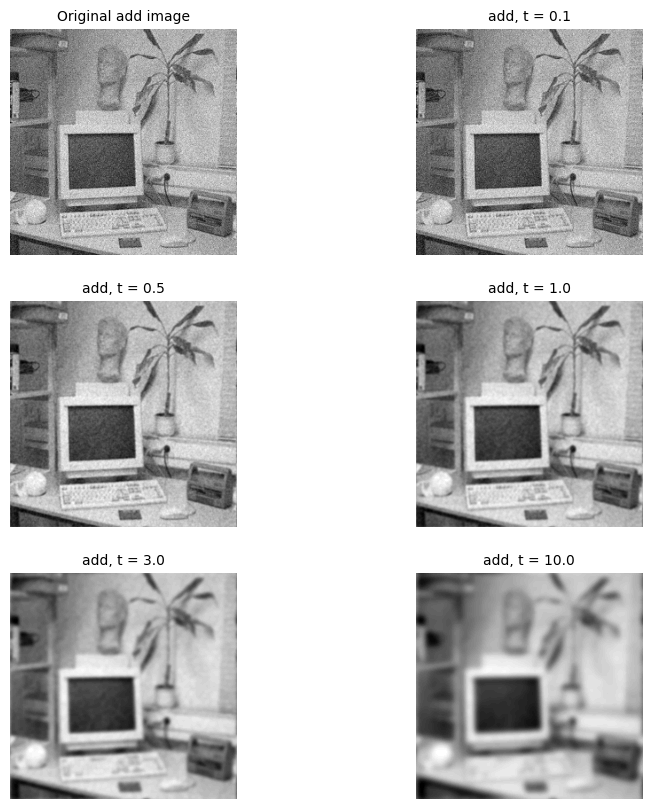

In [31]:
n_rows=3
n_cols=2
t_s = [0.1,0.5,1.0,3.0,10.0]

f=plt.figure(figsize=(10,10))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a = f.add_subplot(n_rows,n_cols, 1)
a.set_title('Original add image')
showgrey(add,False)
i=2
for t in t_s:
    a  = f.add_subplot(n_rows,n_cols, i)
    a.set_title('add, t = '+str(t))
    showgrey(gaussfft(add,t),False)
    i+=1

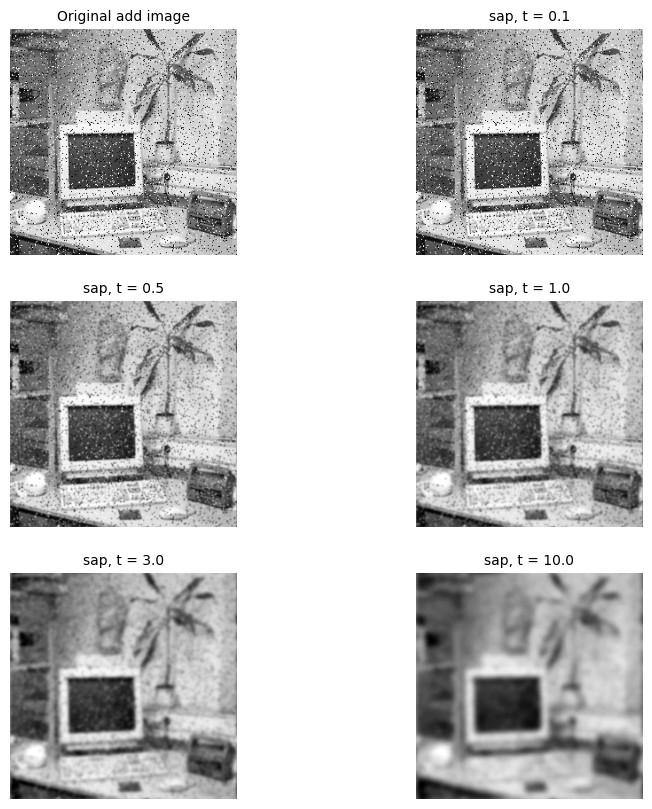

In [32]:
f=plt.figure(figsize=(10,10))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a = f.add_subplot(n_rows,n_cols, 1)
a.set_title('Original add image')
showgrey(sap,False)
i=2
for t in t_s:
    a  = f.add_subplot(n_rows,n_cols, i)
    a.set_title('sap, t = '+str(t))
    showgrey(gaussfft(sap,t),False)
    i+=1

### Median filtering

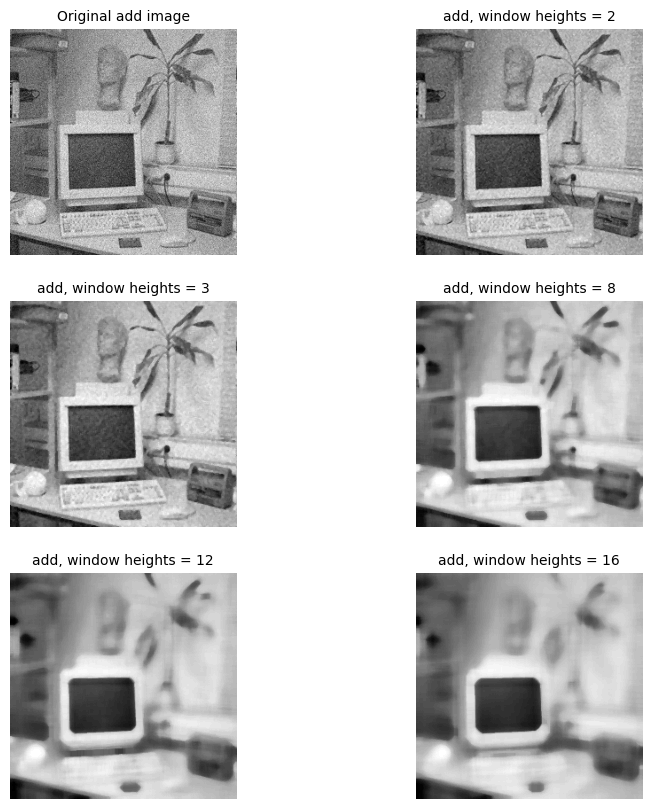

In [33]:
n_rows=3
n_cols=2
w_heights = [2,3,8,12,16]

f=plt.figure(figsize=(10,10))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a = f.add_subplot(n_rows,n_cols, 1)
a.set_title('Original add image')
showgrey(add,False) 
i=2
for w in w_heights:
    a = f.add_subplot(n_rows,n_cols, i)
    a.set_title('add, window heights = '+str(w))
    showgrey(medfilt(add,w),False)
    i+=1
plt.show()


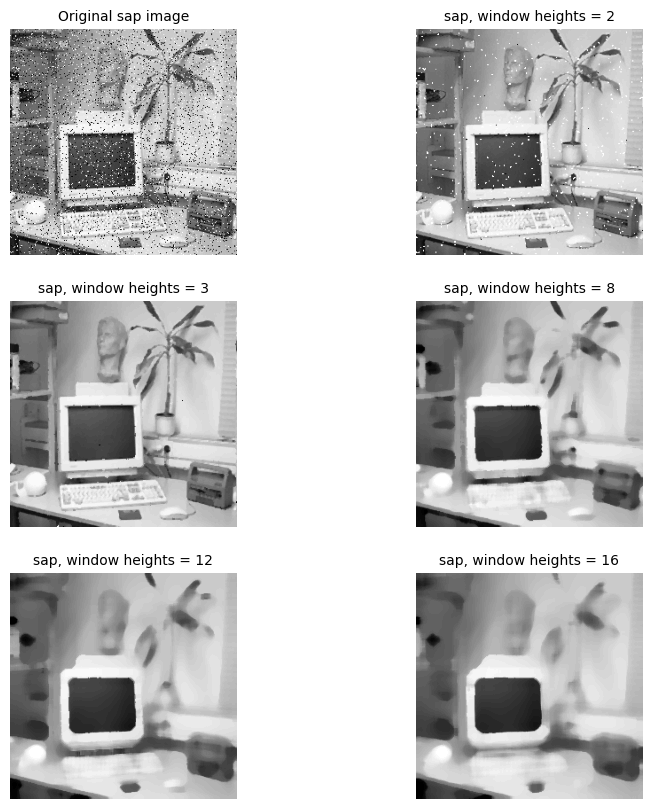

In [34]:
f=plt.figure(figsize=(10,10))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a = f.add_subplot(n_rows,n_cols, 1)
a.set_title('Original sap image')
showgrey(sap,False) 
i=2
for w in w_heights:
    a = f.add_subplot(n_rows,n_cols, i)
    a.set_title('sap, window heights = '+str(w))
    showgrey(medfilt(sap,w),False)
    i+=1
plt.show()

### Ideal low-pass filter

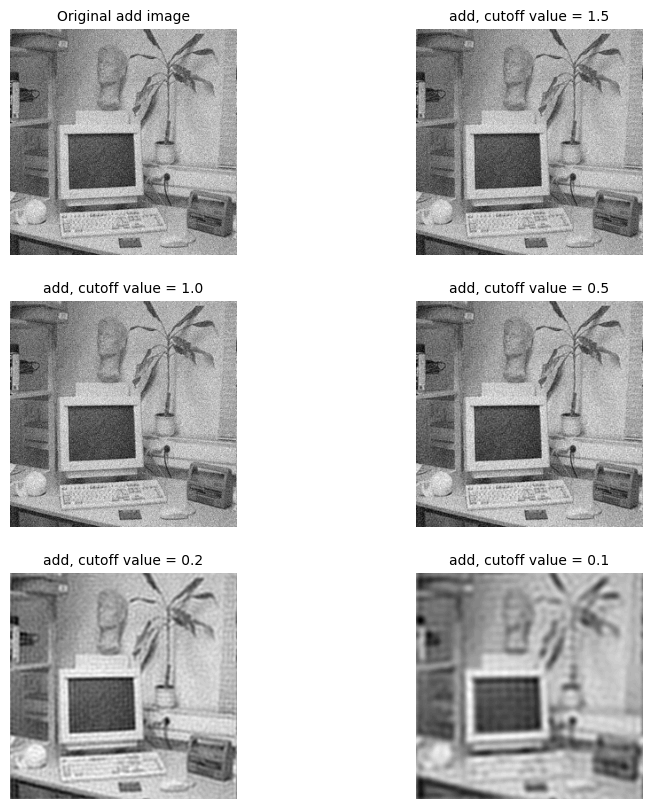

In [35]:
n_rows=3
n_cols=2
cutoffs = [1.5,1.0,0.5,0.2,0.1]
f=plt.figure(figsize=(10,10))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a = f.add_subplot(n_rows,n_cols, 1)
a.set_title('Original add image')
showgrey(add,False) 
i=2
for cutoff in cutoffs:
    a = f.add_subplot(n_rows,n_cols, i)
    a.set_title('add, cutoff value = '+str(cutoff))
    showgrey(ideal(add,cutoff),False)
    i+=1
plt.show()

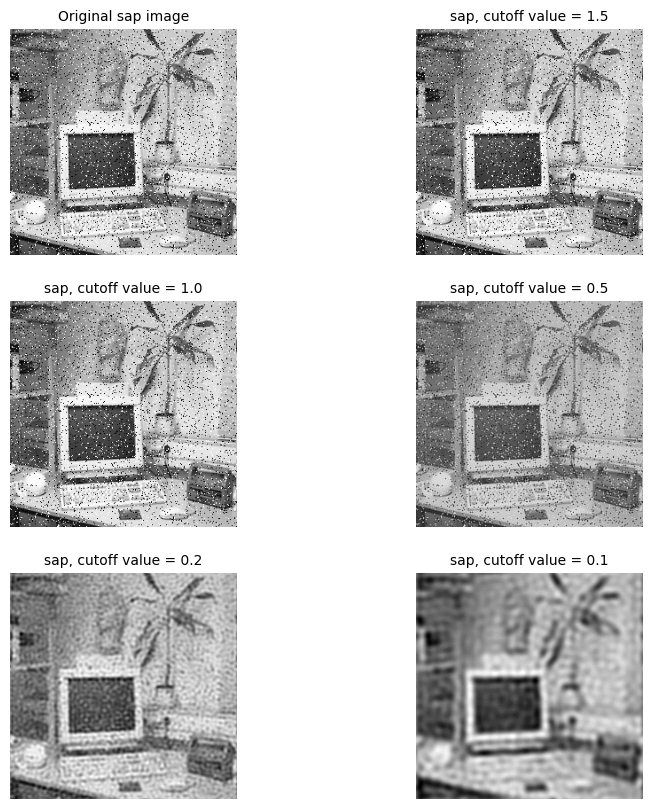

In [36]:
f=plt.figure(figsize=(10,10))
f.subplots_adjust(wspace=0.1, hspace=0.2)
a = f.add_subplot(n_rows,n_cols, 1)
a.set_title('Original sap image')
showgrey(sap,False) 
i=2
for cutoff in cutoffs:
    a = f.add_subplot(n_rows,n_cols, i)
    a.set_title('sap, cutoff value = '+str(cutoff))
    showgrey(ideal(sap,cutoff),False)
    i+=1
plt.show()

## 3.2

In [37]:
def smooth_subsample(filter, k):
    """ Smoothing and subsampling of the image phonecalc256.
        Args:
        filter: 'gaussian' or 'ideal'
        k: parameter for the filter"""
    img = np.load("Images-npy/phonecalc256.npy") 
    smoothing = img
    N=5
    f = plt.figure(figsize=(10,10))
    f.subplots_adjust(wspace=0.5, hspace=0.2) 
    for i in range(N):
        if i>0: # generate subsampled versions 
            img = rawsubsample(img)
            if filter=='gaussian':
                smoothing = gaussfft(smoothing, k)
            else:
                smoothing = ideal(smoothing, k)
            smoothing = rawsubsample(smoothing)
        a =f.add_subplot(2, N, i + 1) 
        a.set_title('Non-smoothed, i= '+str(i))
        showgrey(img, False)
        b = f.add_subplot(2, N, i + N + 1) 
        b.set_title(filter+', i= '+str(i))
        showgrey(smoothing, False)
    f.tight_layout()
    plt.show()

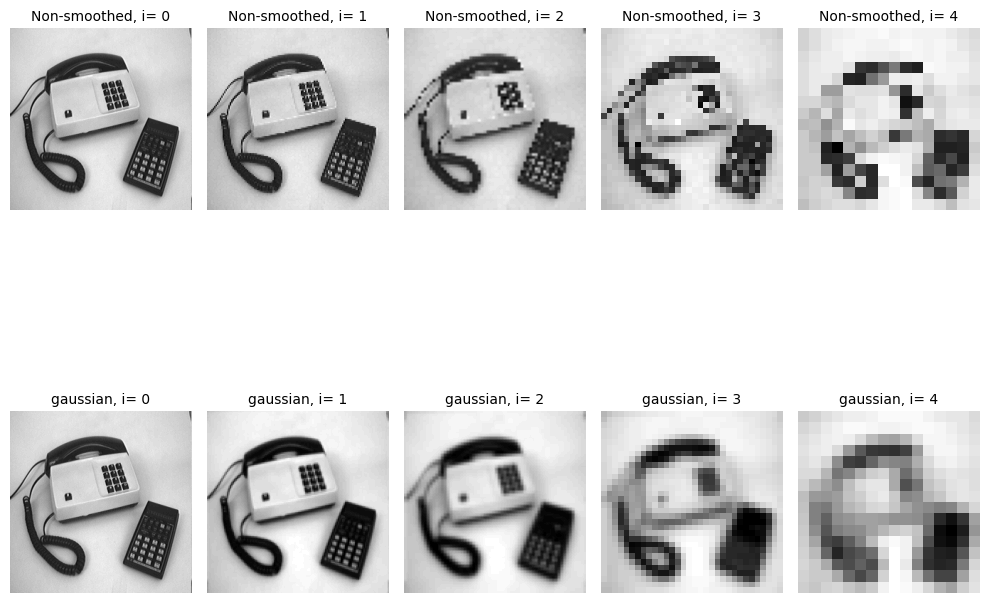

In [38]:
smooth_subsample('gaussian', 1.1)

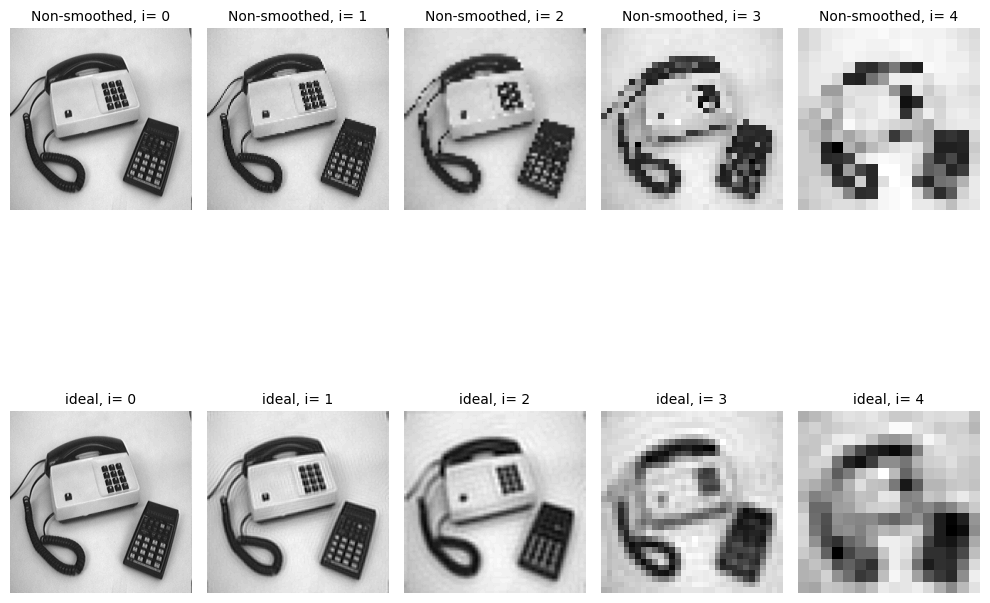

In [39]:
smooth_subsample('ideal', 0.2)